# 회귀

## 1. 경사하강법 파이썬으로 구현
- p.314

## 1-1. 단순선형회귀에서 경사하강법 적용

In [ ]:
# step1:w1,w0를 임의의 값으로 설정하고 첫 비용 함수의 값을 계산
# step2:w1,w0 각 편미분 결과값을 이전 w에서 마이너스해서 새로운 w값 구한다.
# step3:비용함수가 감소하는 방향성으로 주어진 횟수만큼 step2반복하면서 w1,w0업데이트

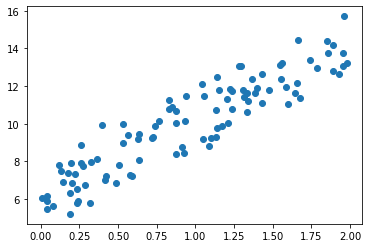

In [30]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# 회귀식인 y=4X+6을 근사하기위해 100개의 데이터셋을 만들고, 경사하강법으로 회귀계수 w0(편향),w1(기울기,가중치)을 도출
np.random.seed(0)
# y=4X+6을 근사(w1=4, w0=6). 임의의 값은 노이즈를 위해 만듦.
X = 2*np.random.rand(100,1) # 0~1 사이의 random 소수 
y = 6+4 * X+np.random.randn(100,1)

#X,y 데이터 셋 산점도로 시각화
plt.scatter(X,y)

In [31]:
# 비용함수로 정의. 실제값y, 예측값y_pred로 받아서 수식에 넣기
def get_cost(y, y_pred):
    N = len(y)
    cost = np.sum(np.square(y - y_pred))/N
    return cost

In [32]:
# w1, w0을 업데이트할 w1_update, w0_update를 반환
# 입력배열X에 대한 예측배열y_pred는 np.dot(X,w1.T)+w0으로 구한다.
# 100개의 X(1,2,..,100)이 있다면 예측값은 w0+X(1)*w1+X(2)*w1+..+X(100)*w1이며, X와 w1배열의 내적과 동일하다.
def get_weight_updates(w1,w0,X,y,learning_rate=0.01):
    N=len(y)
    # 먼저 w1_update, w0_update를 각각 w1,w0의 shape와 동일한 크기를 가진 0값으로 초기화
    w1_update = np.zeros_like(w1)
    w0_update = np.zeros_like(w0)
    # 예측배열 계산하고 예측과 실제값의 차이 계산
    y_pred = np.dot(X,w1.T)+w0
    diff = y-y_pred
    
    # w0_update를 dot행렬연산으로 구하기 위해 모두 1값을 가진 행렬 생성
    w0_factors = np.ones((N,1))
    # w1,w0을 업데이트할 w1_update,w0_update계산
    w1_update = -(2/N)*learning_rate*(np.dot(X.T,diff))
    w0_update = --(2/N)*learning_rate*(np.dot(w0_factors.T,diff))
    
    return w1_update,w0_update

In [35]:
# w1, w0을 업데이트할 w1_update, w0_update를 반환
# 입력배열X에 대한 예측배열y_pred는 np.dot(X,w1.T)+w0으로 구한다.
# 100개의 X(1,2,..,100)이 있다면 예측값은 w0+X(1)*w1+X(2)*w1+..+X(100)*w1이며, X와 w1배열의 내적과 동일하다.
def get_weight_updates(w1, w0, X, y, learning_rate=0.01):
    N = len(y)
    # 먼저 w1_update, w0_update를 각각 w1,w0의 shape와 동일한 크기를 가진 0값으로 초기화
    w1_update = np.zeros_like(w1)
    w0_update = np.zeros_like(w0)
    # 예측배열 계산하고 예측과 실제값의 차이 계산
    y_pred = np.dot(X, w1.T) + w0
    diff = y - y_pred
    # w0_update를 dot행렬연산으로 구하기 위해 모두 1값을 가진 행렬 생성
    w0_factors = np.ones((N,1))

    # w1과 w0를 업데이트할 w1_update와 w0_update 계산
    w1_update = -(2/N)*learning_rate*(np.dot(X.T, diff))
    w0_update = -(2/N)*learning_rate*(np.dot(w0_factors.T, diff))

    return w1_update, w0_update

In [36]:
# 경사하강법 함수 생성 : w1,w0모두 0으로 초기화해서 iters 갯수만큼 반복해서 업데이트
# 업데이트는 새로운 w1=이전w1+편미분한 수식을 반복하는것.(w0도 동일)
def gradient_descent_stpes(X, y, iters=10000):
    # 초기값 0으로 설정
    w0 = np.zeros((1,1))
    w1 = np.zeros((1,1))

    # 인자로 주어진 iters만큼 반복적으로 get_weight_updates() 호출해 w1, w0 업데이트
    for ind in range(iters):
        w1_update, w0_update = get_weight_updates(w1, w0, X, y, learning_rate=0.01)
        w1 = w1 - w1_update
        w0 = w0 - w0_update

    return w1, w0

In [37]:
# gradient_descent_steps 호출해서 w1,w0구하기
# 최종적으로 예측값과 실제값의 RSS차이구하는 get_cost함수 생성
def get_cost(y, y_pred):
    N = len(y)
    cost = np.sum(np.square(y - y_pred))/N
    return cost

w1, w0 = gradient_descent_stpes(X,y, iters=1000)
print(f"w1 : {w1[0,0]:.3f}, w0 : {w0[0,0]:.3f}")
y_pred = w1[0, 0]*X + w0
print("GD Total Cost", round(get_cost(y, y_pred),4))

w1 : 4.022, w0 : 6.162
GD Total Cost 0.9935


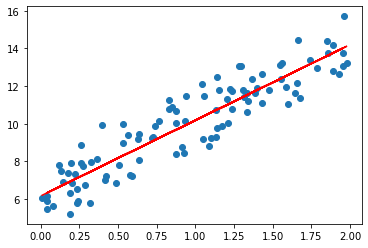

In [39]:
plt.scatter(X,y)
plt.plot(X,y_pred,'r')

### stochastic

- 확률적 경사하강법(SGD;Stochastic Gradient Descent)은 추출된 데이터 한개에 대해서 그래디언트를 계산하고, 경사 하강 알고리즘을 적용하는 방법이다.
- 매 step에서 한개의 샘플을 무작위로 선택하고 그 샘플에 대한 gradient를 계산하기때문에 한 step당 계산하는 속도가 매우 빠르다.
- 반면 확률적으로 샘플링하기때문에, 이 알고리즘은 불안정하다. cost function이 최솟값에 다다를 때까지 smooth하게 감소하지 않고 요동치며 감소한다. 시간이 지나면 최솟값에 매우 근접하겠지만 fluctuation이 지속되면서 minimum에 안착하지 못할 수 있다.

In [40]:
def stochastic_gradient_descent_steps(X,y,batch_size=10, iters=1000):
    w0 = np.zeros((1,1))
    w1 = np.zeros((1,1))
    prev_cost = 100000
    iter_index = 0
    
    for ind in range(iters):
        np.random.seed(ind)
        # 전체 X,y데이터에서 랜덤하게 batch_size만큼 데이터를 추출해 sample_X,sample_y로 저장
        stochastic_random_index = np.random.permutation(X.shape[0])
        sample_X = X[stochastic_random_index[0:batch_size]]
        sample_y = y[stochastic_random_index[0:batch_size]]
        # 랜덤하게 batch_size만큼 추출된 데이터 기반으로 w1_update,w0_update계산 후 업데이트
        w1_update, w0_update = get_weight_updates(w1,w0,sample_X,sample_y,learning_rate=0.01)
        w1 = w1-w1_update
        w0 = w0-w0_update
        
    return w1,w0

In [41]:
w1,w0 = stochastic_gradient_descent_steps(X,y,iters=1000)
print('w1:', round(w1[0,0],3), 'w0:', round(w0[0,0],3))
y_pred = w1[0,0]*X +w0
print('SGD Total Cost:{0:.4f}'.format(get_cost(y,y_pred)))
# 확률적 경사하강법을 사용해본 결과 w1,w0은 경사하강법의 결과와 큰 차이가 없으며, 
# 예측오류비용 또한 0.9937로 경사하강법으로 구한 예측오류비용보다 아주 조금 높을뿐으로 큰 예측성능상의 차이가 없음을 알 수 있다.
# 따라서 큰 데이터를 처리할 경우에는 경사하강법은 매우 시간이 오래 걸리므로 일반적으로 확률적 경사하강법을 이용한다.

w1: 4.028 w0: 6.156
SGD Total Cost:0.9937


## 2. 사이킷런 LinearRegression을 이용한 보스턴 주택가격 예측

- 사이킷런의 linear_models 모듈은 매우 다양한 종류의 선형기반 회귀를 클래스로 구현해 제공한다.
- http://scikit-learn.org/stable/modules/classes.html#module-sklearn.linear_model 에서 다양한 선형모듈 확인가능

- LinearRegression클래스는 예측값과 실제값의 RSS를 최소화해 OLS(Ordinary Least Squares)추정 방식으로 구현한 클래스이다.
- LinearRegression클래스는 fit()메서드로 X,y배열을 입력받으면 회귀계수인 W를 coef_속성에 저장한다.

- LinearRegression은 계수 w = (w1,…, wp)를 사용하여 선형 모델을 피팅하여 데이터 세트에서 관찰 된 목표와 선형 근사에 의해 예측 된 목표 사이의 잔차 제곱합을 최소화한다.
    - fit_intercept : 모형에 intercept상수항(절편;그래프와 겹쳐있는 점)이 있는가 없는가를 결정하는 인수 (default : True). False로 설정하면 계산에 인터셉트가 사용되지 않습니다 (예 : 데이터가 중앙에 배치 될 것으로 예상 됨).
    - normalize : 매개변수 무시 여부. fit_intercept가 False로 설정된 경우 이 매개 변수는 무시된다 . True인 경우 회귀 변수 X는 평균을 빼고 l2- 노름으로 나누어 회귀 전에 정규화된다. 표준화하려면 normalize=False를 사용 하여 추정기에 fit 을 호출하기 전에 StandardScaler 를 사용 .
    - copy_X : X의 복사 여부. 그렇지 않으면 덮어 쓸 수 있다.
    - n_jobs : 계산에 사용할 작업 수. 이것은 n_targets> 1과 충분한 큰 문제에 대해서만 속도 향상을 제공
    - positivebool : True 로 설정 하면 계수가 양수가됩니다. 이 옵션은 고밀도 어레이에만 지원

In [ ]:
from sklearn.linear_model import LinearRegression